In [3]:
import pymc3 as pm
import numpy as np

from theano.tensor.nnet import softmax
from theano.tensor import argmax, zeros, inc_subtensor

import seaborn as sns
sns.set(color_codes=True)

from matplotlib import pyplot as plt

## Model

### To Generate Data $P_i(\mathcal{X})$

In [4]:
class FeatureGenerator(pm.Model):
    def __init__(self, n_clusters, n_clients_p_cluster, std_intra, std_inter, n_features,name='', model=None):
        super().__init__(name, model)        
        
        # model
        cluter_center = pm.Normal('cluster_centers',mu=np.zeros(n_features), sigma=std_intra, shape=(n_clusters,n_features))
        pm.Normal('cluster_data', mu=cluter_center[:,:, None], sigma=std_inter, shape=(n_clusters, n_features, n_clients_p_cluster))

#### Paramters of Distribution

In [5]:
N_CLUSTERS = 3
N_CLIENTS_PER_CLUSTER = 7
STD_INTER_CLUSTER = 1
STD_INTRA_CLUSTER = 1
N_FEATURES = 5

In [6]:
feature_generator = FeatureGenerator(N_CLUSTERS,N_CLIENTS_PER_CLUSTER,STD_INTER_CLUSTER,STD_INTRA_CLUSTER,N_FEATURES)

AttributeError: module '__main__' has no attribute 'Model'

In [ ]:
feature_generator

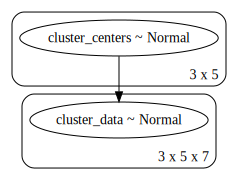

In [104]:
pm.model_to_graphviz(feature_generator)

# Varying Client Distributions

In [1]:
def create_clusters(n_clusters, std_intra, std_inter, n_clients_p_cluster=20):
    model=FeatureGenerator(n_clusters=n_clusters, n_clients_p_cluster=n_clients_p_cluster, std_intra=std_intra, std_inter=std_inter, n_features=2)
    trace = pm.sample_prior_predictive(1, model)
    for cluster in range(n_clusters):
        axes = sns.kdeplot(trace['cluster_data'][cluster,0,:], trace['cluster_data'][cluster,1,:],alpha=0.5) 

## Two Cluters with the Same Distribution

In [2]:
create_clusters(2, 0.01, 1)

NameError: name 'FeatureGenerator' is not defined

## Many Clusters from the Same Distriubution

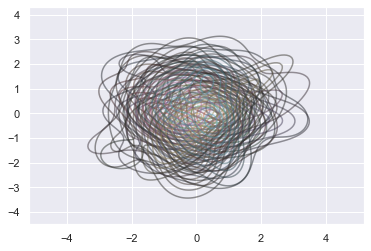

In [86]:
create_clusters(10, 0.01, 1)

## Three Different Cluters that form a Single Distribution

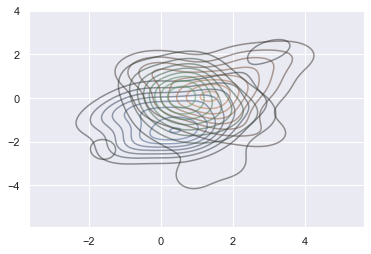

In [87]:
create_clusters(3, 1, 1)

## Three Clearly Distinct Clusters

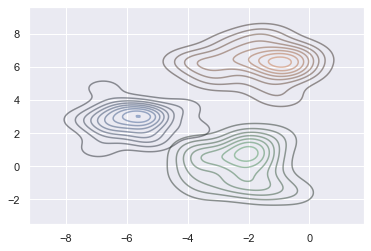

In [88]:
create_clusters(3, 5, 1)

## Many Clusters Belonging to a Different Distribution

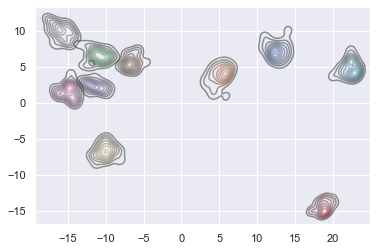

In [113]:
create_clusters(10, 10, 1)